### Notebook to visualize mutations in CTNNB1 BTRCP degorn and compare its stability versus other mutations and WT
- Figure 3d

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import gridspec
from scipy import stats

### paths

In [3]:
base="../../" 


dataset_rppa_irls_tcga = os.path.join(base,"data/rppa_matched_irls.tsv.gz")
dataset_rppa_irls_ccle = os.path.join(base,"data/rppa_matched_irls_ccle.tsv.gz")

path_output_missense_degrons_rppa_tcga = os.path.join(base,"data","missense_clean_type_rppa.tsv.gz")
path_output_indels_degrons_rppa_tcga = os.path.join(base,"data","indels_clean_type_rppa.tsv.gz")

path_output_missense_degrons_rppa_ccle = os.path.join(base,"data","missense_clean_type_rppa_ccle.tsv.gz")
path_output_indels_degrons_rppa_ccle = os.path.join(base,"data","indels_clean_type_rppa_ccle.tsv.gz")


output_path_plots = os.path.join(base,"plots/Figure3/")

### Define the protein and E3 ligase of interest

In [4]:
degron = "DEG_SCF_TRCP1_1"
protein = "CTNNB1"
e3 = "APC"

#### TCGA

In [5]:
# Raw data
df_missense_raw = pd.read_csv(path_output_missense_degrons_rppa_tcga,sep="\t",compression="gzip")
df_indels_raw = pd.read_csv(path_output_indels_degrons_rppa_tcga,sep="\t",compression="gzip")
df_all_rppa = pd.read_csv(dataset_rppa_irls_tcga,sep="\t",compression="gzip")
phenotypes = ["Mutation_Altering_Motif","Mutation_Flanking_PTM"]
# Prepare the datasets 
# Wild type
df_wt = df_all_rppa[(df_all_rppa["Phenotype"]=="WT")&(df_all_rppa["CNA"]<=1)&(df_all_rppa["CNA"]>=-1)&(df_all_rppa["Hugo_Symbol"]==protein)&(~df_all_rppa["Altered_E3_Ligases"])]
df_wt["Type"] = "WT"
# Other alterations
# Missense
df_missense_other = df_missense_raw[(df_missense_raw["Type_Missense"]=="Other_Missense")&(df_missense_raw["CNA"]<=1)&(df_missense_raw["CNA"]>=-1)&(df_missense_raw["Hugo_Symbol"]==protein)&(~df_missense_raw["Altered_E3_Ligases"])&(~((df_missense_raw["Disrupt_Epitope"])&(df_missense_raw["Stability_Change"]<0)))]
df_missense_other["Type"] = "Other_Alterations"
# Indels
df_indels_other = df_indels_raw[(df_indels_raw["Type_In_Frame_Alteration"]=="Other_In_Frame")&(df_indels_raw["Phenotype"].str.contains("In_Frame"))&(df_indels_raw["CNA"]<=1)&(df_indels_raw["CNA"]>=-1)&(df_indels_raw["Hugo_Symbol"]==protein)&(~df_indels_raw["Altered_E3_Ligases"])&(~((df_indels_raw["Disrupt_Epitope"])&(df_indels_raw["Stability_Change"]<0)))]
df_indels_other["Type"] = "Other_Alterations"
# Alterations degron
# missense
df_missense_degron = df_missense_raw[(df_missense_raw["Type_Missense"].isin(phenotypes))&(df_missense_raw["DEGRON"]==degron)&(df_missense_raw["Phenotype"]=="Missense_Mutation")&(df_missense_raw["CNA"]<=1)&(df_missense_raw["CNA"]>=-1)&(df_missense_raw["Hugo_Symbol"]==protein)&(~df_missense_raw["Altered_E3_Ligases"])&(~((df_missense_raw["Disrupt_Epitope"])&(df_missense_raw["Stability_Change"]<0)))]
df_missense_degron["Type"] = "Alteration_Degron"
# indel
df_indels_degron = df_indels_raw[(df_indels_raw["DEGRON"]==degron)&(df_indels_raw["Phenotype"].str.contains("In_Frame"))&(df_indels_raw["CNA"]<=1)&(df_indels_raw["CNA"]>=-1)&(df_indels_raw["Hugo_Symbol"]==protein)&(~df_indels_raw["Altered_E3_Ligases"])&(~((df_indels_raw["Disrupt_Epitope"])&(df_indels_raw["Stability_Change"]<0)))]
df_indels_degron["Type"] = "Alteration_Degron"

# Alterations E3 ligase
df_e3_ligase = df_all_rppa[(df_all_rppa["Hugo_Symbol"]==protein)&(df_all_rppa["Phenotype"]=="WT")&(df_all_rppa["CNA"]<=1)&(df_all_rppa["CNA"]>=-1)&(df_all_rppa["Hugo_Symbol"]==protein)&(df_all_rppa["Ubiquitinases_Mutated"].str.contains(e3))&(df_all_rppa["Altered_E3_Ligases"])]
df_e3_ligase["Type"] = "Alteration_E3_Ligase"

columns = ["Type","Stability_Change","Phenotype","Matchable_Sample_ID"]


df_total_tcga = pd.concat([df_wt[columns],df_missense_other[columns],df_missense_degron[columns],df_indels_degron[columns]])
df_total_tcga["Dataset"] = "TCGA"



/home/fran/Downloads/yes/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fran/Downloads/yes/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fran/Downloads/yes/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

In [6]:
len(df_missense_degron[df_missense_degron["Type"].str.contains("Alteration_Degron")]["protein_mutation"].unique()) + len(df_indels_degron[df_indels_degron["Type"].str.contains("Alteration_Degron")]["protein_mutation"].unique()) 

22

#### CCLE

In [7]:
# Raw data
df_missense_raw = pd.read_csv(path_output_missense_degrons_rppa_ccle,sep="\t",compression="gzip")
df_indels_raw = pd.read_csv(path_output_indels_degrons_rppa_ccle,sep="\t",compression="gzip")
df_all_rppa = pd.read_csv(dataset_rppa_irls_ccle,sep="\t",compression="gzip")
# Prepare the datasets 
# Wild type
df_wt = df_all_rppa[(df_all_rppa["Phenotype"]=="WT")&(df_all_rppa["CNA"]<=1)&(df_all_rppa["CNA"]>=-1)&(df_all_rppa["Hugo_Symbol"]==protein)&(~df_all_rppa["Altered_E3_Ligases"])]
df_wt["Type"] = "WT"
# Other alterations
# Missense
df_missense_other = df_missense_raw[(df_missense_raw["Type_Missense"]=="Other_Missense")&(df_missense_raw["CNA"]<=1)&(df_missense_raw["CNA"]>=-1)&(df_missense_raw["Hugo_Symbol"]==protein)&(~df_missense_raw["Altered_E3_Ligases"])&(~((df_missense_raw["Disrupt_Epitope"])&(df_missense_raw["Stability_Change"]<0)))]
df_missense_other["Type"] = "Other_Alterations"
# Indels
df_indels_other = df_indels_raw[(df_indels_raw["Type_In_Frame_Alteration"]=="Other_In_Frame")&(df_indels_raw["Phenotype"].str.contains("In_Frame"))&(df_indels_raw["CNA"]<=1)&(df_indels_raw["CNA"]>=-1)&(df_indels_raw["Hugo_Symbol"]==protein)&(~df_indels_raw["Altered_E3_Ligases"])&(~((df_indels_raw["Disrupt_Epitope"])&(df_indels_raw["Stability_Change"]<0)))]
df_indels_other["Type"] = "Other_Alterations"
# Alterations degron
# missense
df_missense_degron = df_missense_raw[(df_missense_raw["Type_Missense"].isin(phenotypes))&(df_missense_raw["DEGRON"]==degron)&(df_missense_raw["Phenotype"]=="Missense_Mutation")&(df_missense_raw["CNA"]<=1)&(df_missense_raw["CNA"]>=-1)&(df_missense_raw["Hugo_Symbol"]==protein)&(~df_missense_raw["Altered_E3_Ligases"])&(~((df_missense_raw["Disrupt_Epitope"])&(df_missense_raw["Stability_Change"]<0)))]
df_missense_degron["Type"] = "Alteration_Degron"
# indel
df_indels_degron = df_indels_raw[(df_indels_raw["DEGRON"]==degron)&(df_indels_raw["Phenotype"].str.contains("In_Frame"))&(df_indels_raw["CNA"]<=1)&(df_indels_raw["CNA"]>=-1)&(df_indels_raw["Hugo_Symbol"]==protein)&(~df_indels_raw["Altered_E3_Ligases"])&(~((df_indels_raw["Disrupt_Epitope"])&(df_indels_raw["Stability_Change"]<0)))]
df_indels_degron["Type"] = "Alteration_Degron"

# Alterations E3 ligase
df_e3_ligase = df_all_rppa[(df_all_rppa["Hugo_Symbol"]==protein)&(df_all_rppa["Phenotype"]=="WT")&(df_all_rppa["CNA"]<=1)&(df_all_rppa["CNA"]>=-1)&(df_all_rppa["Hugo_Symbol"]==protein)&(df_all_rppa["Ubiquitinases_Mutated"].str.contains(e3))&(df_all_rppa["Altered_E3_Ligases"])]
df_e3_ligase["Type"] = "Alteration_E3_Ligase"

columns = ["Type","Stability_Change","Phenotype","Matchable_Sample_ID"]


df_total_ccle= pd.concat([df_wt[columns],df_missense_other[columns],df_missense_degron[columns],df_indels_degron[columns]])
df_total_ccle["Dataset"] = "CCLE"



/home/fran/Downloads/yes/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fran/Downloads/yes/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fran/Downloads/yes/lib/python3.6/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

### Combine both datasets

In [8]:
len(df_missense_degron[df_missense_degron["Type"].str.contains("Alteration_Degron")]["protein_mutation"].unique()) + len(df_indels_degron[df_indels_degron["Type"].str.contains("Alteration_Degron")]["protein_mutation"].unique()) 

11

In [9]:
df_total = pd.concat([df_total_ccle,df_total_tcga])

In [10]:
df_total_tcga.shape

(6227, 5)

In [11]:
df_total["Type"].unique()

array(['WT', 'Other_Alterations', 'Alteration_Degron'], dtype=object)

#### Visualize it

TCGA:  60 34 6133
CCLE:  16 28 936


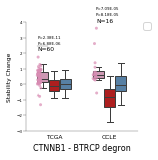

In [12]:
p = {"Other_Alterations":"#cc0000","Alteration_Degron":"#d98cb3","WT":"#4682B4","Alteration_E3_Ligase":"#FFA500"}
s = ["Alteration_Degron","Other_Alterations","WT"]
datasets = ["TCGA","CCLE"]
fig,ax = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(2, 2.)
size_strip=3
g = sns.stripplot(data=df_total[(df_total["Type"].str.contains("Alteration_Degron"))&(df_total["Phenotype"]=="Missense_Mutation")],x="Dataset",y="Stability_Change",order=datasets,alpha=0.7,size=size_strip,palette=p,jitter=True,dodge=True,hue="Type",hue_order=s)
g = sns.stripplot(data=df_total[(df_total["Type"].str.contains("Alteration_Degron"))&(df_total["Phenotype"].str.contains("In_Frame"))],x="Dataset",y="Stability_Change",order=datasets,alpha=0.7,size=size_strip,palette=p,jitter=True,dodge=True,hue="Type",hue_order=s,marker="^")
sns.boxplot(x="Dataset",y="Stability_Change",data=df_total,width=0.6,saturation=0.7,order=datasets,palette=p,fliersize=0.,ax=ax, linewidth=1,whis=0.9,notch=False,hue="Type",hue_order=s)

# Legend
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:0], labels[0:0], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# TCGA analysis

N_alteration = df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="TCGA")].shape[0]
N_alteration_other = df_total[(df_total["Type"]=="Other_Alterations")&(df_total["Dataset"]=="TCGA")].shape[0]
N_wt = df_total[(df_total["Type"]=="WT")&(df_total["Dataset"]=="TCGA")].shape[0]

print ("TCGA: ",N_alteration,N_alteration_other,N_wt)
# Write numbers of N

maxv = np.nanmax(list(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="TCGA")]["Stability_Change"].values))
minv = np.nanmin(list(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="TCGA")]["Stability_Change"].values))

ax.text(y=maxv+0.4,x=-0.30,s="N="+str(N_alteration),fontsize=6)




# Calculate significance 
# TCGA

pvalue_motif_wt = stats.mannwhitneyu(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="TCGA")]["Stability_Change"].values,df_total[(df_total["Type"]=="WT")&(df_total["Dataset"]=="TCGA")]["Stability_Change"].values)[1]
pvalue_motif_mt = stats.mannwhitneyu(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="TCGA")]["Stability_Change"].values,df_total[(df_total["Type"]=="Other_Alterations")&(df_total["Dataset"]=="TCGA")]["Stability_Change"].values)[1]

ax.axhline(y=maxv+0.7,xmin=0.10,xmax=0.20,color="black",linewidth=0.25)
if pvalue_motif_wt < 0.05:
    ax.text(y=maxv+1.2,x=-0.30,s="P="+str("{0:.2E}".format(pvalue_motif_wt)),fontsize=4)
else:
    ax.text(y=maxv+1.2,x=-0.30,s="P=n.s.",fontsize=4)
    
if pvalue_motif_mt < 0.05:
    ax.text(y=maxv+0.8,x=-0.30,s="P="+str("{0:.2E}".format(pvalue_motif_mt)),fontsize=4)
else:
    ax.text(y=maxv+0.8,x=-0.30,s="P=n.s.",fontsize=4)

    
# CCLE analysis

N_alteration = df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="CCLE")].shape[0]
N_alteration_other = df_total[(df_total["Type"]=="Other_Alterations")&(df_total["Dataset"]=="CCLE")].shape[0]
N_wt = df_total[(df_total["Type"]=="WT")&(df_total["Dataset"]=="CCLE")].shape[0]

print ("CCLE: ",N_alteration,N_alteration_other,N_wt)

# Write numbers of N

maxv = np.nanmax(list(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="CCLE")]["Stability_Change"].values))
minv = np.nanmin(list(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="CCLE")]["Stability_Change"].values))

ax.text(y=maxv+0.4,x=0.76,s="N="+str(N_alteration),fontsize=6)



# Calculate significance 
# CCLE

pvalue_motif_wt = stats.mannwhitneyu(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="CCLE")]["Stability_Change"].values,df_total[(df_total["Type"]=="WT")&(df_total["Dataset"]=="CCLE")]["Stability_Change"].values)[1]
pvalue_motif_mt = stats.mannwhitneyu(df_total[(df_total["Type"]=="Alteration_Degron")&(df_total["Dataset"]=="CCLE")]["Stability_Change"].values,df_total[(df_total["Type"]=="Other_Alterations")&(df_total["Dataset"]=="CCLE")]["Stability_Change"].values)[1]

ax.axhline(y=maxv+0.7,xmin=0.6,xmax=0.70,color="black",linewidth=0.25)
if pvalue_motif_wt < 0.05:
    ax.text(y=maxv+1.2,x=0.75,s="P="+str("{0:.2E}".format(pvalue_motif_wt)),fontsize=4)
else:
    ax.text(y=maxv+1.2,x=0.75,s="P=n.s.",fontsize=6)
    
if pvalue_motif_mt < 0.05:
    ax.text(y=maxv+0.8,x=0.75,s="P="+str("{0:.2E}".format(pvalue_motif_mt)),fontsize=4)
else:
    ax.text(y=maxv+0.8,x=0.75,s="P=n.s.",fontsize=6)

    
    
ax.set_ylabel("Stability Change",fontsize=6)
ax.set_xticklabels(datasets,fontsize=8)
#ax.set_xticks([])



ylim = (-3,4)
ax.set_ylim(ylim)
ax.set_yticks([x for x in range(ylim[0],ylim[1]+1,1)])
ax.tick_params(axis = 'y', labelsize =4  , pad=0.5 ,width=0.25)
ax.tick_params(axis = 'x', labelsize =6  , pad=0.5 ,width=0.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
ax.set_xlabel("CTNNB1 - BTRCP degron",fontsize=8)


plt.savefig(output_path_plots+"/CTNNB1.pdf",bbox_inches="tight")